<a href="https://colab.research.google.com/github/NCAR/lrose-solo-python/blob/main/TestSolo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup Workspace

Install Miniconda, create environment, install pyArt and relevant dependencies

In [1]:
print('\x1b[32mInstalling Miniconda...\x1b[0m')
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

print('\x1b[32mUpdating Conda...\x1b[0m')
! yes | conda update -n base -c defaults conda
print('\x1b[32mCreating environment...\x1b[0m')
! yes | conda create -n pyart_env -c conda-forge python=3.8 arm_pyart
print('\x1b[32mInstalling Cartopy...\x1b[0m')
! yes | conda install -c conda-forge cartopy
print('\x1b[32mInstalling PyArt...\x1b[0m')
! yes | conda install -c conda-forge arm_pyart
print('\x1b[32mInstalling Pip...\x1b[0m')
! yes | conda install pip
import google.colab
google.colab.output.clear()
print('\x1b[32mSuccessfully installed dependencies!\x1b[0m')


Import the libraries installed above

In [2]:
import netCDF4
import pyart
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from copy import deepcopy


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



/usr/local/lib/python3.7/dist-packages/yaml/constructor.py:126: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  if not isinstance(key, collections.Hashable):


Install and import the PySolo package

In [3]:
! pip install -i https://test.pypi.org/simple/ pysolo-wip==0.0.63
import pysolo_package as solo

Looking in indexes: https://test.pypi.org/simple/


# Testing despeckle with sample data

In [28]:
# sample data 1
input_data = [3, 4, 5, 6]
bad = -3
a_speckle = 1
dgi_clip_gate = 4
boundary_mask = [True, True, True, True]

expected_data = [3, 4, 5, 6] # no change

# run despeckle
output = solo.despeckle(input_data, bad, a_speckle, boundary_mask, dgi_clip_gate)
assert output.data == expected_data
print("Correct")

Correct


In [29]:
# sample data 2
input_data = [-3, -3, 5, -3]
bad = -3
a_speckle = 1
dgi_clip_gate = 2
boundary_mask = [True, True, True, True]

expected_data = [-3, -3, 5, -3]

# run despeckle
output = solo.despeckle(input_data, bad, a_speckle, boundary_mask, dgi_clip_gate)
assert output.data == expected_data
print("Correct")

Correct


In [30]:
# sample data 3
input_data = [-3, -3, 5, -3]
bad = -3
a_speckle = 1
dgi_clip_gate = 3
boundary_mask = [True, True, True, True]

expected_data = [-3, -3, 5, -3]

# run despeckle
output = solo.despeckle(input_data, bad, a_speckle, boundary_mask, dgi_clip_gate)
assert output.data == expected_data
print("Correct")

Correct


In [31]:
# sample data 4
input_data = [3,-3, 5, 5, 5, -3 ,6]
bad = -3
a_speckle = 3
dgi_clip_gate = 7
boundary_mask = [True, True, True, True, True, True, True]

expected_data = [-3,-3,-3,-3,-3,-3, -3]

# run despeckle
output = solo.despeckle(input_data, bad, a_speckle, boundary_mask, dgi_clip_gate)
assert output.data == expected_data
print("Correct")

Correct


In [32]:
# sample data 5
input_data = [3, -3, -3, 5, 5, 5, -3, 5, 5, -3]
bad = -3
a_speckle = 3
dgi_clip_gate = 8
boundary_mask = [True, True, True, True, True, True, True, True, True, True]

expected_data = [-3, -3, -3, -3, -3, -3, -3, 5, 5, -3]

# run despeckle
output = solo.despeckle(input_data, bad, a_speckle, boundary_mask, dgi_clip_gate)
assert output.data == expected_data
print("Correct")

Correct


In [33]:
# sample data 6
input_data = [3, -3, -3, 5, 5, 5, -3, 5, 5, -3]
bad = -3
a_speckle = 3
dgi_clip_gate = 8
boundary_mask = [True, True, False, False, False, False, False, False, False, False]

expected_data = [-3, -3, -3, 5, 5, 5, -3, 5, 5, -3]

# run despeckle
output = solo.despeckle(input_data, bad, a_speckle, boundary_mask, dgi_clip_gate)
assert output.data == expected_data
print("Correct")

Correct


In [34]:
# sample data 7
input_data = [3,-3, -3, 5, 5, 5, -3, 5, 5, -3]
bad = -3
a_speckle = 3
dgi_clip_gate = 8
boundary_mask = [True, True, True, True, False, False, False, False, False, False]

expected_data = [-3, -3, -3, 5, 5, 5, -3, 5, 5, -3]

# run despeckle
output = solo.despeckle(input_data, bad, a_speckle, boundary_mask, dgi_clip_gate)
assert output.data == expected_data
print("Correct")

Correct


In [35]:
# sample data 8
input_data = [-3.0, -3.0, -3.0, 5.0, 5.0, 5.0, -3.0, 5.0, 5.0, -3.0]
bad = -3.0
a_speckle = 3
dgi_clip_gate = 10
boundary_mask = [False, False, False, False, False, False, True, True, True, True]

expected_data = [-3.0, -3.0, -3.0, 5.0, 5.0, 5.0, -3.0, -3.0, -3.0, -3]

# run despeckle
output = solo.despeckle(input_data, bad, a_speckle, boundary_mask, dgi_clip_gate)
assert output.data == expected_data
print("Correct")

Correct


In [36]:
# sample data 9
input_data = [-3, -3, -3, 5, 5, 5, -3, 5, 5, -3]
bad = -3
a_speckle = 3
dgi_clip_gate = 10
boundary_mask = [False, False, True, True, True, True, True, True, False, False]

expected_data = [-3, -3, -3,-3,-3,-3, -3, 5, 5, -3]

# run despeckle
output = solo.despeckle(input_data, bad, a_speckle, boundary_mask, dgi_clip_gate)
assert output.data == expected_data
print("Correct")

Correct


In [37]:
# sample data 10
input_data = [5, -3, -3, -3, 5, 5, -3]
bad = -3
a_speckle = 3
dgi_clip_gate = 5
boundary_mask = [True, True, True, True, True, True, True]

expected_data = [-3, -3, -3, -3, 5, 5, -3]

# run despeckle
output = solo.despeckle(input_data, bad, a_speckle, boundary_mask, dgi_clip_gate)
assert output.data == expected_data
print("Correct")

Correct


In [38]:
# sample data 11
input_data = [-3,  5,  5, -3, -3, 5, 5]
bad = -3
a_speckle = 3
dgi_clip_gate = 5
boundary_mask = [False, False, True, True, True, True, False]

expected_data = [-3, 5, 5, -3, -3, 5, 5]

# run despeckle
output = solo.despeckle(input_data, bad, a_speckle, boundary_mask, dgi_clip_gate)
assert output.data == expected_data
print("Correct")

Correct


In [39]:
# sample data 8.2 testing with slight error in float value for bad data
input_data = [-3.0, -3.0, -3.0, 5.0, 5.0, 5.0, -3.0, 5.0, 5.0, -3.0]
bad = -3.000002
a_speckle = 3
dgi_clip_gate = 10
boundary_mask = [False, False, False, False, False, False, True, True, True, True]

expected_data = [-3.0, -3.0, -3.0, 5.0, 5.0, 5.0, -3.0, -3.0, -3.0, -3]

# run despeckle
output = solo.despeckle(input_data, bad, a_speckle, boundary_mask, dgi_clip_gate)
assert output.data != expected_data
print("Correct")

Correct


# Extract real data from file

Load data file from Cloud and save to object

In [4]:
! wget -O radar_data.nc https://www.dropbox.com/s/lltr0hyt3excg2g/radar_data.nc?dl=0
data = netCDF4.Dataset("/content/radar_data.nc")

--2021-06-04 18:45:25--  https://www.dropbox.com/s/lltr0hyt3excg2g/radar_data.nc?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/lltr0hyt3excg2g/radar_data.nc [following]
--2021-06-04 18:45:25--  https://www.dropbox.com/s/raw/lltr0hyt3excg2g/radar_data.nc
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc946dd6e3b14081b1e05478c3e8.dl.dropboxusercontent.com/cd/0/inline/BPxpBkLpzfTfq69THKhZy5An3uNtH2G3P4yanAcgdE3HeRQyo5_bOaajOcqTQVQFr42mKKh-SSjm0kug3AN0FNFcZepxLPkM0ztDdmxrO97Jd46tSc5lRf3GtwR7nWmBJ8FJnfisrGairkK7YpD8Af_c/file# [following]
--2021-06-04 18:45:25--  https://uc946dd6e3b14081b1e05478c3e8.dl.dropboxusercontent.com/cd/0/inline/BPxpBkLpzfTfq69THKhZy5An3uNtH2G3P4yanAcgdE3HeRQyo5_bOaajOcqTQVQFr42mKKh-SSjm0kug3A

Read NetCDF file, save result to Radar object

In [5]:
# Read the NetCDF data.
radar = pyart.io.read("/content/radar_data.nc")

Retrieve all fields from Data

In [6]:
list(radar.fields.keys())

['DBZ_TOT',
 'DBZ',
 'VEL',
 'WIDTH',
 'SQI',
 'VG',
 'VR',
 'SW',
 'NCP',
 'ZZ',
 'VV',
 'V1',
 'DBZTEST',
 'VGTEST',
 'Z1',
 'ZC',
 'VC']

Extract 'ZZ' and 'VV' fields. Also obtain boundary mask.

In [7]:
missing_ZZ = radar.fields['ZZ']['data'].fill_value
rays_data_ZZ = radar.fields['ZZ']['data'].tolist(missing_ZZ)

print("[ZZ] Missing Value: %d" % missing_ZZ)
print("[ZZ] Number of Rays: %d" % len(rays_data_ZZ))
print("[ZZ] Number of Gates per Ray: %d\n" % len(rays_data_ZZ[0]))

missing_VV = radar.fields['VV']['data'].fill_value
rays_VV = radar.fields['VV']['data'].tolist(missing_VV)
print("[VV] Missing Value: %d" % missing_VV)
print("[VV] Number of Rays: %d" % len(rays_VV))
print("[VV] Number of Gates per Ray: %d\n" % len(rays_VV[0]))

rays_mask_ZZ = radar.fields['ZZ']['data'].mask.tolist()

[ZZ] Missing Value: -32768
[ZZ] Number of Rays: 360
[ZZ] Number of Gates per Ray: 627

[VV] Missing Value: -32768
[VV] Number of Rays: 360
[VV] Number of Gates per Ray: 627



# Testing despeckle with real data

Do a despeckle on ZZ field

There's two methods to do this:


---




Method 1:

1.   from [numpy masked array](https://numpy.org/doc/stable/reference/maskedarray.generic.html) (obtained from PyArt reading the file), obtain ray info containing data, mask, and fill value
2.   iterate through all rays, run `despeckle` on each ray, then save resultant ray to a list
3.   repackage as a numpy masked array

In [44]:
#@title Despeckle Parameters

# step 1 done in previous section

output_ZZ_data = []
output_ZZ_mask = []

a_speckle = 2 #@param {type: "slider", min: 1, max: 16}

# step 2: iterate through each ray
for n in range(len(rays_data_ZZ)):
    input_ZZ_ray = rays_data_ZZ[n]  # for n'th ray's data
    boundary_mask = rays_mask_ZZ[n] # for n'th ray's mask

    # run despeckle on n'th ray's values
    despec = solo.despeckle(input_ZZ_ray, missing_ZZ, a_speckle, boundary_mask, boundary_mask_all_true=True)
    # this function returned object containing 'data' and 'mask' attributes
    # extract these, add them to list
    output_ZZ_data.append(despec.data)
    output_ZZ_mask.append(despec.mask)

# step 3: repackage as numpy masked array
despeckled_mask_A = np.ma.masked_array(data=output_ZZ_data, mask=output_ZZ_mask, fill_value=missing_ZZ)

Method 2:

1.   pass in the masked array and a_speckle values as parameter to `despseckle_masked`
2.   function returns resultant masked array

In [45]:
despeckled_mask_B = solo.despeckle_masked(radar.fields['ZZ']['data'], a_speckle)

Verify both method 1 and method 2 provide same result.

In [46]:
assert np.ma.allequal(despeckled_mask_B, despeckled_mask_A)

Create a new field (inheriting properties of ZZ) using the newly obtained despeckled masked array

In [47]:
despeckled_mask_A = np.ma.masked_array(data=output_ZZ_data, mask=output_ZZ_mask, fill_value=missing_ZZ)

radar.add_field_like('ZZ', 'ZZ_despeckled', despeckled_mask_A, replace_existing=True)

assert ('ZZ_despeckled' in radar.fields)

Plot PPI for ZZ, original vs despeckled

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:748: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)
/usr/local/lib/python3.7/site-packages/pyart/graph/radardisplay.py:104: UserWarning: RadarDisplay does not correct for moving platforms
  warnings.warn('RadarDisplay does not correct for moving platforms')


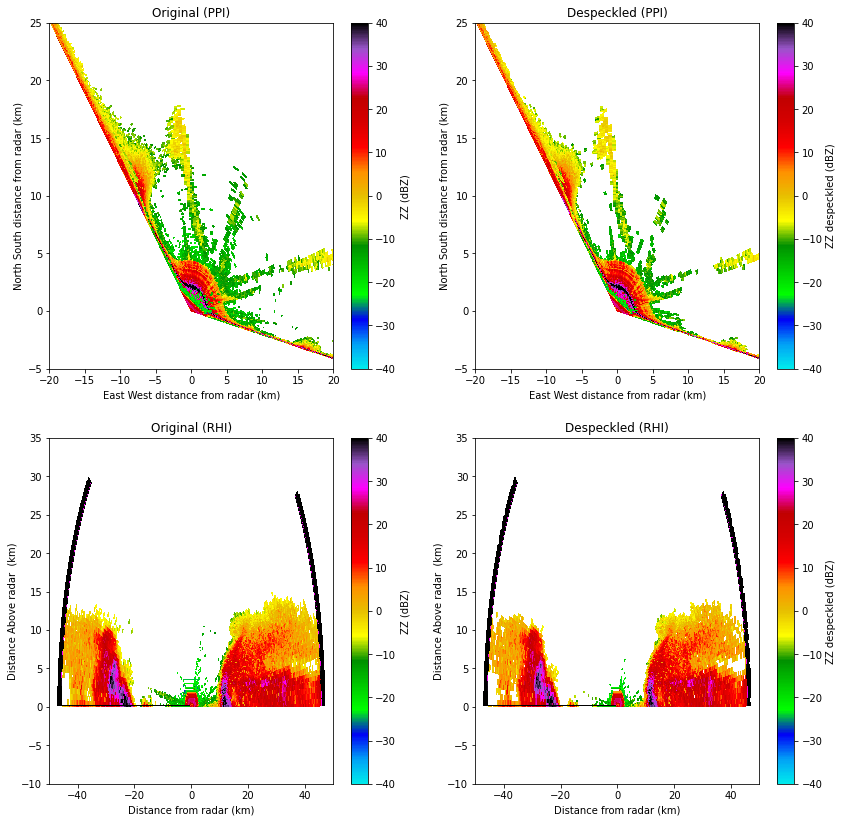

In [48]:
display = pyart.graph.RadarMapDisplay(radar)

fig = plt.figure(figsize=(14, 14))

ax = fig.add_subplot(221)
display.plot_ppi(field='ZZ', vmin=-40, vmax=40, title="Original (PPI)", cmap='pyart_NWSRef')
display.set_limits((-20, 20), (-5, 25), ax=ax)

ax = fig.add_subplot(222)
display.plot_ppi(field='ZZ_despeckled', vmin=-40, vmax=40, title="Despeckled (PPI)", cmap='pyart_NWSRef')
display.set_limits((-20, 20), (-5, 25), ax=ax)

ax = fig.add_subplot(223)
display.plot(field='ZZ', vmin=-40, vmax=40, title="Original (RHI)", cmap='pyart_NWSRef')
display.set_limits((-50, 50), (-10, 35), ax=ax)

ax = fig.add_subplot(224)
display.plot(field='ZZ_despeckled', vmin=-40, vmax=40, title="Despeckled (RHI)", cmap='pyart_NWSRef')
display.set_limits((-50, 50), (-10, 35), ax=ax)

plt.show()

# Testing ring zap with sample data

In [49]:
from_km = 2
to_km = 9
input_data = [-3, 4, 6, -3, 8, -3, 10, 12, 14, -3, -3]
bad = -3
boundary_mask = [False, False, False, False, False, False, False, False, False, False, False]
expected_data = [-3, 4, 6, -3, 8, -3, 10, 12, 14, -3, -3]
output_data = solo.ring_zap(from_km, to_km, input_data, bad, boundary_mask)
assert (output_data.data == expected_data)
print("Correct")

Correct


In [50]:
from_km = 2
to_km = 9
input_data = [-3, 4, 6, -3, 8, -3, 10, 12, 14, -3, -3]
bad = -3
boundary_mask = [True, True, True, True, True, True, True, True, True, True, True]
expected_data = [-3, 4, -3, -3, -3, -3, -3, -3, -3, -3, -3]
output_data = solo.ring_zap(from_km, to_km, input_data, bad, boundary_mask)
assert (output_data.data == expected_data)
print("Correct")

Correct


In [51]:
from_km = 2
to_km = 9
input_data = [-3, 4, 6, -3, 8, -3, 10, 12, 14, -3, -3]
bad = -3
boundary_mask = [True, True, True, True, False, True, True, True, True, True, True]
expected_data = [-3, 4, -3, -3, 8, -3, -3, -3, -3, -3, -3]
output_data = solo.ring_zap(from_km, to_km, input_data, bad, boundary_mask)
assert (output_data.data == expected_data)
print("Correct")

Correct


# Test Ring Zap with Real Data

Run ring zap on all rays

In [52]:
#@title Despeckle Parameters
output_ZZ_data = []
output_ZZ_mask = []

from_km =  5 #@param {type: "number"}
to_km = 6 #@param {type: "number"}

kilometers_between_gates = radar.range['meters_between_gates'] / 1000
from_km_convert = int(from_km / kilometers_between_gates)
to_km_convert = int(to_km / kilometers_between_gates)

for i in range(len(rays_data_ZZ)):
    input_ZZ_data = rays_data_ZZ[i]
    boundary_mask = rays_mask_ZZ[i]

    # run despeckle
    ring_zap = solo.ring_zap(from_km, to_km, input_ZZ_data, missing_ZZ, boundary_mask, boundary_mask_all_true=True)
    output_ZZ_data.append(ring_zap.data)
    output_ZZ_mask.append(ring_zap.mask)

ring_zapped_mask_A = np.ma.masked_array(data=output_ZZ_data, mask=output_ZZ_mask, fill_value=missing_ZZ)


In [53]:
ring_zapped_mask_B = solo.ring_zap_masked(radar.fields['ZZ']['data'], from_km, to_km, kilometers_between_gates)

In [54]:
assert np.ma.allequal(ring_zapped_mask_B, ring_zapped_mask_A)

In [55]:
radar.add_field_like('ZZ', 'ZZ_ring_zapped', ring_zapped_mask_A, replace_existing=True)

assert ('ZZ_ring_zapped' in radar.fields)

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:748: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)
/usr/local/lib/python3.7/site-packages/pyart/graph/radardisplay.py:104: UserWarning: RadarDisplay does not correct for moving platforms
  warnings.warn('RadarDisplay does not correct for moving platforms')


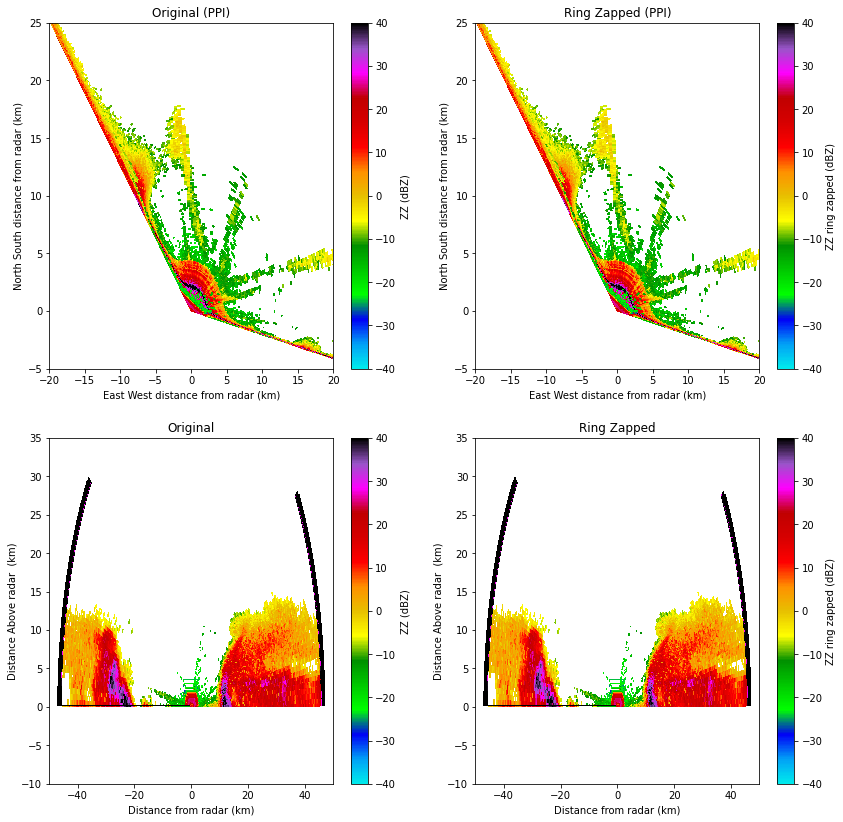

In [56]:
display = pyart.graph.RadarMapDisplay(radar)

fig = plt.figure(figsize=(14, 14))

ax = fig.add_subplot(221)
display.plot_ppi(field='ZZ', vmin=-40, vmax=40, title="Original (PPI)", cmap='pyart_NWSRef')

display.set_limits((-20, 20), (-5, 25), ax=ax)

ax = fig.add_subplot(222)
display.plot_ppi(field='ZZ_ring_zapped', vmin=-40, vmax=40, title="Ring Zapped (PPI)", cmap='pyart_NWSRef')
display.set_limits((-20, 20), (-5, 25), ax=ax)

ax = fig.add_subplot(223)
display.plot(field='ZZ', vmin=-40, vmax=40, title="Original", cmap='pyart_NWSRef')

display.set_limits((-50, 50), (-10, 35), ax=ax)

ax = fig.add_subplot(224)
display.plot(field='ZZ_ring_zapped', vmin=-40, vmax=40, title="Ring Zapped", cmap='pyart_NWSRef')
display.set_limits((-50, 50), (-10, 35), ax=ax)

plt.show()

# Test threshold field with sample data

Threshold uses an enum "Where" with values ABOVE, BELOW, and BETWEEN. Reference it as "solo.Where.BELOW" or do "`from... import...`" to shorten to "Where.BELOW"

In [57]:
from pysolo_package import Where

In [58]:
input_data =    [-3,  4,  6, -3,  8,  -3, 10,  12, 14, -3, -3 ]
thr_data =      [-5, 30, 40, 60, -5,  70, -5, 110, -5, 10, 140]
expected_data = [-3,  4,  6, -3,  -3, -3, -3,  12, -3, -3, -3 ]

bad = -3
thr_bad = -5

boundary_mask = [True, True, True, True, True, True, True, True, True, True, True]


output_data = solo.threshold(Where.BELOW.value, 0.333, 0.000, input_data, thr_data, bad, boundary_mask, thr_bad=thr_bad)
assert output_data.data == expected_data
print("Correct")

Correct


In [59]:
input_data =    [-3,  4,  6, -3,  8,  -3, 10,  12, 14, -3, -3 ]
thr_data =      [-5, 30, 40, 60, -5,  70, -5, 110, -5, 10, 140]
expected_data = [-3,  4,  6, -3,  8,  -3, 10,  12, 14, -3, -3 ]

bad = -3
thr_bad = -5

boundary_mask = [False, False, False, False, False, False, False, False, False, False, False]

output_data = solo.threshold(Where.BELOW.value, 0.333, 0.000, input_data, thr_data, bad, boundary_mask, thr_bad=thr_bad)
assert output_data.data == expected_data
print("Correct")

Correct


In [60]:
input_data =    [-3,  4,  6, -3,  8,  -3, 10,  12, 14, -3, -3 ]
thr_data =      [-5, 30, 40, 60, -5,  70, -5, 110, -5, 10, 140]
expected_data = [-3, -3, -3, -3, -3, -3, -3, 12, -3, -3, -3]

bad = -3
thr_bad = -5

boundary_mask = [True, True, True, True, True, True, True, True, True, True, True]

output_data = solo.threshold(Where.BELOW.value, 50, 0.000, input_data, thr_data, bad, boundary_mask, thr_bad=thr_bad)
assert output_data.data == expected_data
print("Correct")

Correct


# Testing threshold field with real data

In [8]:
#@title Despeckle Parameters
output_ZZ_data = []
output_ZZ_mask = []

thr_1 =  -7 #@param {type: "number"}
thr_2 = 0 #@param {type: "number"}
first_good_gate = 0 #@param {type: "number"}

for i in range(len(rays_data_ZZ)):
    input_ZZ_data = rays_data_ZZ[i]
    input_VV_data = rays_VV[i]
    boundary_mask = rays_mask_ZZ[i]

    # run despeckle
    threshold = solo.threshold(solo.Where.BELOW.value, thr_1, thr_2, input_ZZ_data, input_VV_data, missing_ZZ, boundary_mask, boundary_mask_all_true=True)
    output_ZZ_data.append(threshold.data)
    output_ZZ_mask.append(threshold.mask)

threshold_mask_A = np.ma.masked_array(data=output_ZZ_data, mask=output_ZZ_mask, fill_value=missing_ZZ)


In [10]:
threshold_mask_B = solo.threshold_masked(radar.fields['ZZ']['data'], radar.fields['VV']['data'], solo.Where.BELOW.value, thr_1, thr_2)

In [12]:
assert np.ma.allequal(threshold_mask_B, threshold_mask_A)

In [62]:
radar.add_field_like('ZZ', 'ZZ_threshold', threshold_mask_A, replace_existing=True)

assert ('ZZ_threshold' in radar.fields)

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:748: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)
/usr/local/lib/python3.7/site-packages/pyart/graph/radardisplay.py:104: UserWarning: RadarDisplay does not correct for moving platforms
  warnings.warn('RadarDisplay does not correct for moving platforms')


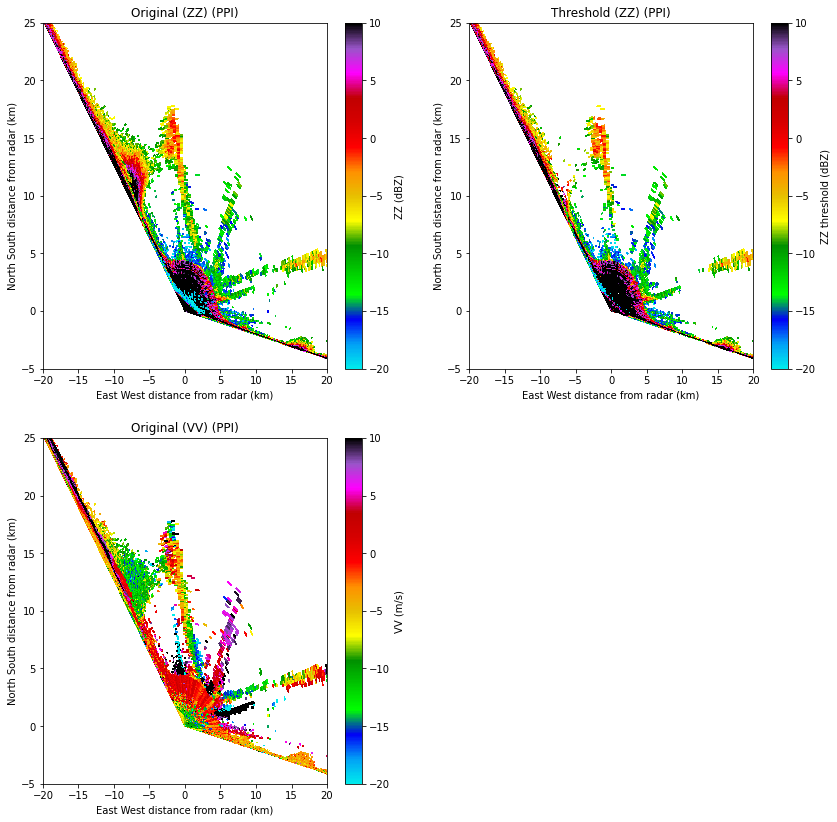

In [63]:
display = pyart.graph.RadarMapDisplay(radar)

fig = plt.figure(figsize=(14, 14))

ax = fig.add_subplot(221)
display.plot_ppi(field='ZZ', vmin=-20, vmax=10, title="Original (ZZ) (PPI)", cmap='pyart_NWSRef')
display.set_limits((-20, 20), (-5, 25), ax=ax)

ax = fig.add_subplot(222)
display.plot_ppi(field='ZZ_threshold', vmin=-20, vmax=10, title="Threshold (ZZ) (PPI)", cmap='pyart_NWSRef')
display.set_limits((-20, 20), (-5, 25), ax=ax)

ax = fig.add_subplot(223)
display.plot_ppi(field='VV', vmin=-20, vmax=10, title="Original (VV) (PPI)", cmap='pyart_NWSRef')
display.set_limits((-20, 20), (-5, 25), ax=ax)

# plt.savefig('/content/drive/Shareddrives/Shared_with_Ammar/ZZ_despeckle.png')
plt.show()